In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "fitbit"

# GDA Case Study - Bellabeat project with R programming 📚

Throughout this project, I will be using all the skills learned via the Google Data Analytics course taken on [Coursera](https://www.coursera.org/professional-certificates/google-data-analytics). 

The steps of data analysis that I will put into practice are: **ask, prepare, process, analyze, share and act.**

I will make sure the data is **ROCCC**? This means making sure this data is:
* Reliable
* Original
* Comprehensive
* Current
* Cited

Let's get into it 📌

# A- Ask？

**Questions**
> What are the problems I am trying to solve for the company Bellabeat? 
> How can my insights help the company to make decisions?

**To be answered**

1. What are some trends in smart device usage?

2. How could these trends apply to Bellabeat customers?

3. How could these trends help influence Bellabeat marketing strategy?

**Business task**

> The company is looking to unlock new growth opportunities

# B - Prepare 📐👷🏾‍♂️

**ROCCC Analysis**
* Reliable: Bellabeat should gather more data that are representative of it's pololation (It's own customer based)

* Original: "Thirty eligible Fitbit users consented to the submission of personal tracker data" It not an original data.

* Comprehensive: The data isn't comprehenside as it doesn't represent the population we are looking to analyse. 

* Current: "This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016". This data set isn't current.

* Cited: Yes, the source was provided by the user MÖBIUS <https://zenodo.org/record/53894#.X9oeh3Uzaao>

The data is stored in wide format. The company (Bellabeat) should gather more data based on it's target (data that capure more info on women) But I can sill use this data to bring up some insights.

**Install Packages, Upload Files**

In [2]:
#Installing tidyverse packages

library("tidyverse")
library("skimr")

In [3]:
#Uploading files

daily_activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

sleep_day <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

# Taking a look at the files

head(daily_activity)

head(sleep_day)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


# C - Process 🛀🏾

In [4]:
# In the daily_activity csv, TotalDistance and Tracker Distance column are duplicated
# Removing TrackerDistance column

daily_activity <- subset (daily_activity, select = -c(TrackerDistance))


head(daily_activity)

# TrackerDistance colum removed

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [5]:
# Formating issues

# 1 - ID as character instead of numeric 

# daily_activity
daily_activity$Id <- as.character(daily_activity$Id)
class(daily_activity$Id)

# sleep_day
sleep_day$Id <- as.character(sleep_day$Id)
class(sleep_day$Id)

[1] "character"

[1] "character"

In [6]:
# 2 - Fixing the time - Converting to date time format and split to date and time.

# daily_activity
daily_activity$ActivityDate=as.POSIXct(daily_activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
daily_activity$date <- format(daily_activity$ActivityDate, format = "%m/%d/%y")

# sleep_day
sleep_day$SleepDay=as.POSIXct(sleep_day$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep_day$date <- format(sleep_day$SleepDay, format = "%m/%d/%y")

head(daily_activity)
head(sleep_day)

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
,<chr>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
2,1503960366,2016-04-13,10735,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
3,1503960366,2016-04-14,10460,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
4,1503960366,2016-04-15,9762,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
5,1503960366,2016-04-16,12669,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
6,1503960366,2016-04-17,9705,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
,<chr>,<dttm>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,1,327,346,04/12/16
2,1503960366,2016-04-13,2,384,407,04/13/16
3,1503960366,2016-04-15,1,412,442,04/15/16
4,1503960366,2016-04-16,2,340,367,04/16/16
5,1503960366,2016-04-17,1,700,712,04/17/16
6,1503960366,2016-04-19,1,304,320,04/19/16


In [7]:
#Merging these two datasets together: daily_activity and sleep_day

daily_activity_merged <- merge(sleep_day, daily_activity, by = c('Id', 'date'))
head(daily_activity_merged)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<chr>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


# D - Analyse 🔍

**Checking distinct values and Summary of the data**

In [8]:
#Checking distinct values

#daily_activity 

n_distinct(daily_activity$Id)

#sleep_day

n_distinct(sleep_day$Id)

[1] 33

[1] 24

This tells us there is 33 distinct participants in the daily_activity and the daily_intensities dataset. While the sleep_day dataset has 24 Participants. 

**Now what are some quick summary statistics we'd want to know about each data frame?**

In [9]:
#daily_activity 

daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         Calories,) %>%
  summary()

daily_activity %>%  
  select(LightlyActiveMinutes,
         FairlyActiveMinutes,
         VeryActiveMinutes,
         SedentaryMinutes,) %>%
  summary()

#sleep_day

sleep_day %>%  
  select(TotalSleepRecords,
  TotalMinutesAsleep,
  TotalTimeInBed) %>%
  summary()

   TotalSteps    TotalDistance       Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :4900  

 LightlyActiveMinutes FairlyActiveMinutes VeryActiveMinutes SedentaryMinutes
 Min.   :  0.0        Min.   :  0.00      Min.   :  0.00    Min.   :   0.0  
 1st Qu.:127.0        1st Qu.:  0.00      1st Qu.:  0.00    1st Qu.: 729.8  
 Median :199.0        Median :  6.00      Median :  4.00    Median :1057.5  
 Mean   :192.8        Mean   : 13.56      Mean   : 21.16    Mean   : 991.2  
 3rd Qu.:264.0        3rd Qu.: 19.00      3rd Qu.: 32.00    3rd Qu.:1229.5  
 Max.   :518.0        Max.   :143.00      Max.   :210.00    Max.   :1440.0  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

* The average steps is **7638**, approximately **5.5kms**
* The average sedentary minutes is **991.2**. Approximately **16 and half hour** sedentary. 
* Users are on average **3 hours lightly active** and they are **less than half an hour fairly or very active**.
* The users sleep on average **7 hours**

Let's visualize 📊!

**1- Total Steps vs Calories**

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


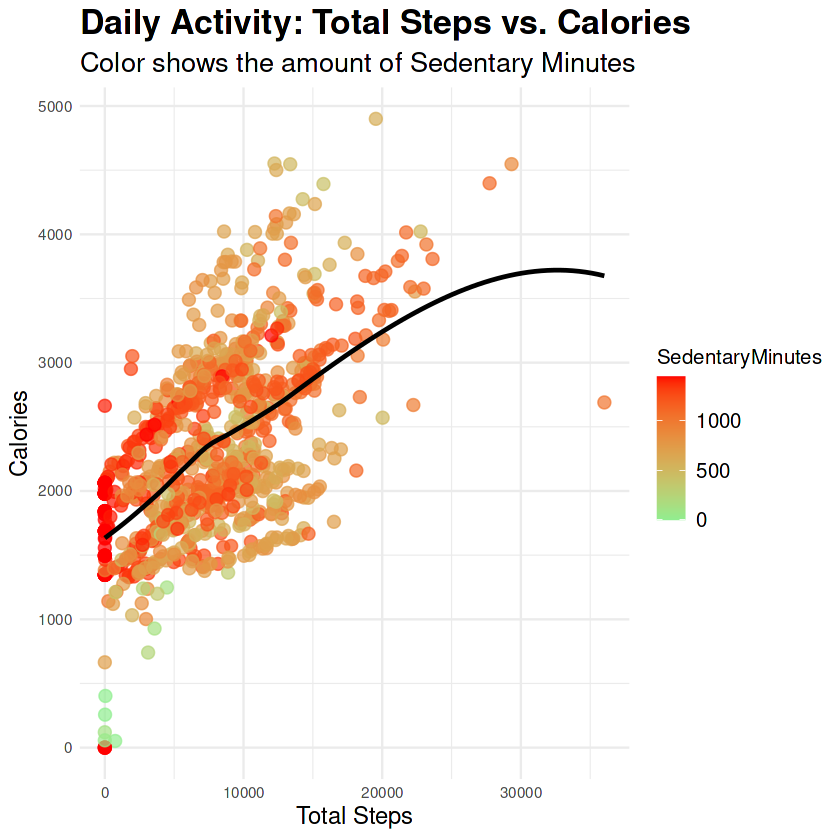

In [10]:
ggplot(data = daily_activity, aes(x = TotalSteps, y = Calories, color = SedentaryMinutes)) + 
  geom_point(size = 3, alpha = 0.7) + 
  scale_color_gradient(low = "lightgreen", high = "red") +
  geom_smooth(method = "loess", se = FALSE, color = "black", size = 1) +
  labs(title = "Daily Activity: Total Steps vs. Calories", 
       subtitle = "Color shows the amount of Sedentary Minutes",
       x = "Total Steps", y = "Calories") + 
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        plot.subtitle = element_text(size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 12)) 

Interpretation of this first visual:

* There is a clear correlation between total steps and calories. This is trending upward. Meaning the more the users are active, the more calories they will burn. It's a fact. 

* The viaual also shows that some sedentary users still burns about 1500 calories with very minimal activities (Little to 0 steps). According to this [Harvard university article](https://www.health.harvard.edu/staying-healthy/burning-calories-without-exercise#:~:text=It's%20called%20the%20%22basal%20metabolic,that%20you%20burn%20some%20calories.), this is explained but what is called the "Basic metabolic rate" or MBR. It is the quantity of energy burnt in order to maintain baci body function while at rest.

* When the number of steps is reaches 10K-13K, the sedentary minutes tend to decrease significantly. Meaning customer becomes somewhat inactive after reaching 10K steps.

**2- Total Distance**

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


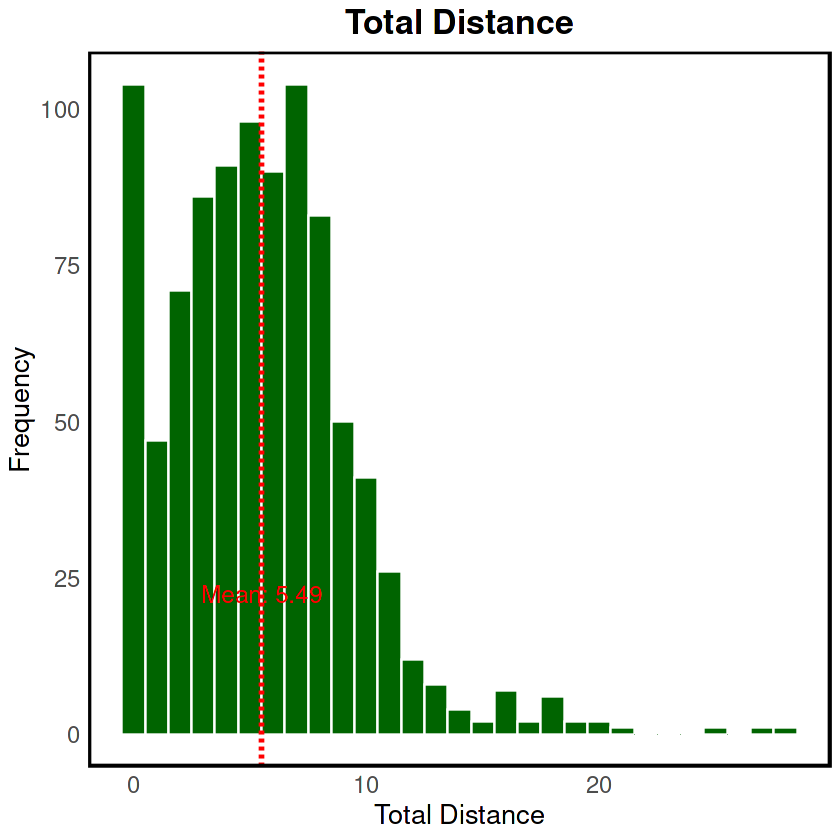

In [11]:
ggplot(daily_activity, aes(TotalDistance)) +
  geom_histogram(binwidth=1, color="white", fill="darkgreen") +
  labs(title="Total Distance", x="Total Distance", y="Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 14),
        axis.title = element_text(size = 16),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        panel.border = element_rect(color = "black", fill = NA, size = 1.2),
        legend.position = "none") +
  geom_vline(aes(xintercept = mean(TotalDistance)), 
             color = "red", 
             size = 1.2, 
             linetype = "dashed") +
  annotate("text", 
           x = mean(daily_activity$TotalDistance), 
           y = max(daily_activity$TotalDistance)*0.8, 
           label = paste0("Mean: ", round(mean(daily_activity$TotalDistance),2)), 
           color = "red",
           size = 5)


* We notice a peak in frequency when the distance reaches 5.49Km. Which means, most users walk about 5Km.

**3- Comparing LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes and SedentaryMinutes**

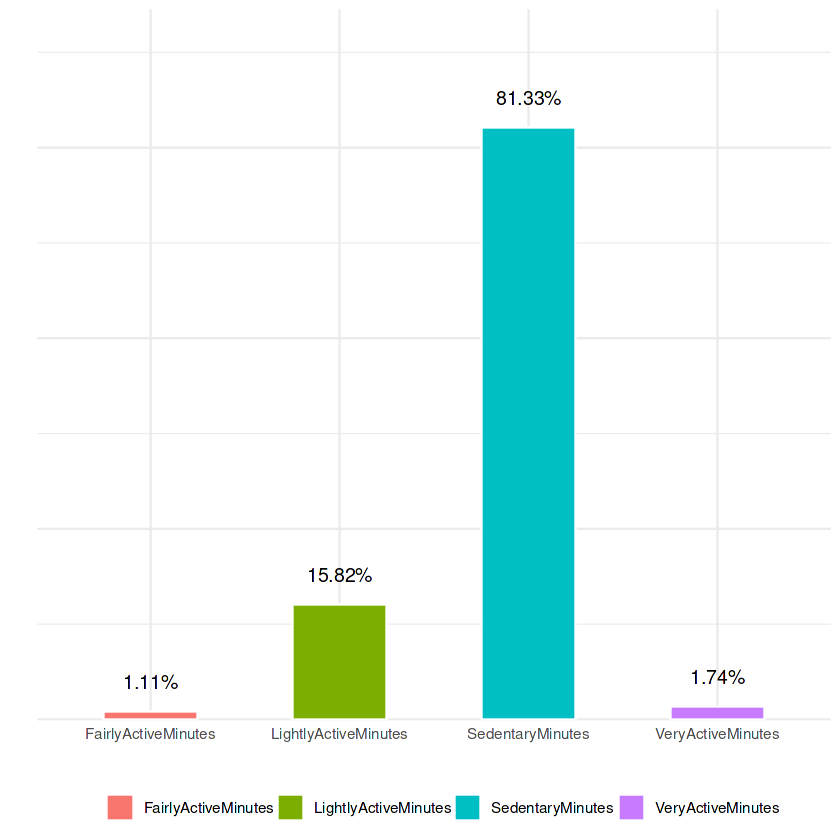

In [12]:
# Select the columns of interest and calculate the sum of minutes for each activity
df <- daily_activity %>%
  select(LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes, SedentaryMinutes) %>%
  summarize_all(sum)

# Calculate the percentage of each activity
df_percent <- df %>%
  pivot_longer(everything(), names_to = "activity", values_to = "minutes") %>%
  mutate(percent = scales::percent(minutes / sum(minutes)))

# Create a bar chart using ggplot()
ggplot(df_percent, aes(x = activity, y = minutes, fill = activity)) +
  geom_bar(stat = "identity", width = 0.5, color = "white") +
  labs(x = "", y = "", fill = "") +
  theme_minimal() +
  theme(legend.position = "bottom",
        axis.line.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()) +
  geom_text(aes(label = percent, y = minutes + max(minutes) * 0.05), position = position_dodge(width = 0.5), size = 4) +
  scale_y_continuous(limits = c(0, max(df$LightlyActiveMinutes, df$FairlyActiveMinutes, df$VeryActiveMinutes, df$SedentaryMinutes) * 1.2),
                     expand = c(0, 0.05))

What can we say reading this graph?

* We can see that the majority of the time recorded in the dataset is spent in a sedentary state, which accounts for 81% of the total time. This suggests that the users are not engaging in much physical activity throughout the day.

* On the other hand, the very active and fairly active minutes are both below 1.5% each, which indicates that the users are not engaging in much vigorous physical activity.

* The lightly active minutes account for 15.82% of the total time, which suggests that the users are engaging in some light physical activity, such as walking or light household chores.

* Overall, this data suggests that the users may benefit from increasing their level of physical activity, particularly by reducing sedentary time and increasing moderate-to-vigorous physical activity.

* According to the [WHO](https://apps.who.int/iris/bitstream/handle/10665/337001/9789240014886-eng.pdf), it is recommended at least 150 to 300 minutes of moderate aerobic activity per week (or the equivalent vigorous activity) for all adults

**4- Total minutes asleep vs Total time in bed**

`geom_smooth()` using formula = 'y ~ x'


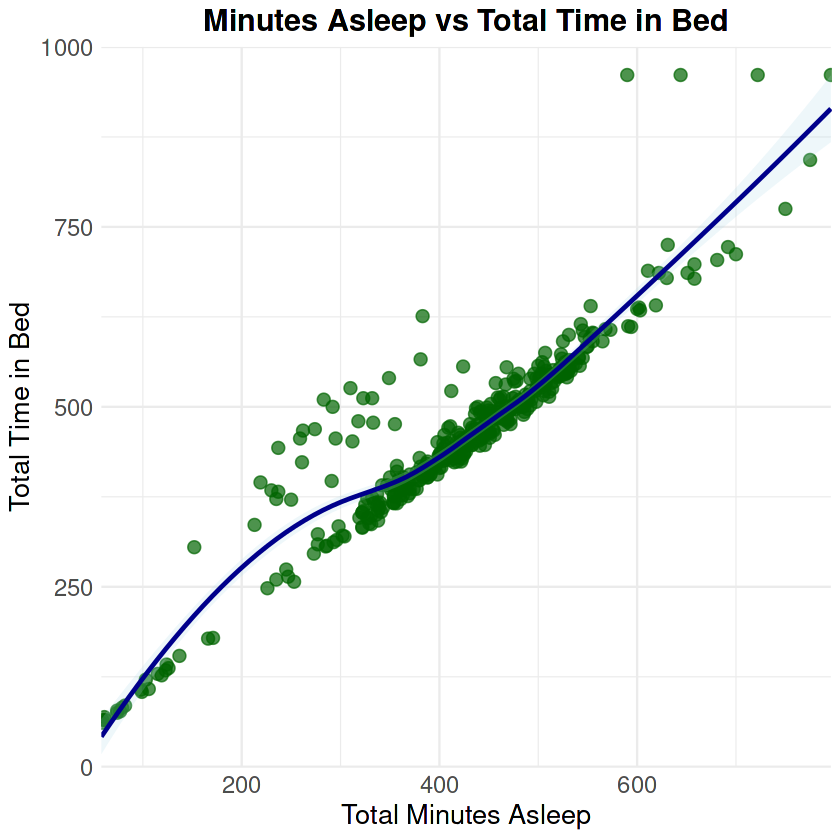

In [13]:
#Total minutes asleep vs Total time in bed

ggplot(data = sleep_day, aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) + 
  geom_point(color = 'darkgreen', size = 3, alpha = 0.7) + 
  geom_smooth(method = "loess", color = 'darkblue', fill = 'lightblue', alpha = 0.2) +
  labs(title = "Minutes Asleep vs Total Time in Bed", 
       x = "Total Minutes Asleep", 
       y = "Total Time in Bed") +
  theme_minimal() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5), 
        axis.title = element_text(size = 16), 
        axis.text = element_text(size = 14)) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0), limits = c(0, 1000))


Interpretation of this second visual:

* This visual explains, on a timeframe of 1000 minutes (16hours) in bed, users tend to be asleep only 7.5 hours (450mins).


# E - Share ✍🏾

Tableau dashboard coming soon...🎯

# F - Act ✅

Recommendations for the marketing team and skateholders: 

* Gather more data for an accurate analysis, specifically for the tagerted audience
* Educate the users to to engage in activities by setting up reminders or sending email/push notifications.
* Just like the the Appwatch or fitbit app, Beallabeat app can have a reward winning system that reward users after completed a certain type of activities.  Like walking/running certain distance per hour, day or month.

* The majority of the time recorded in the dataset is spent in a sedentary state, which accounts for 81% of the total time. This suggests that the users are not engaging in much physical activity throughout the day. Bellabeat should encourage it's users to engage in activities by setting up reminders or sending email/push notifications.  

* If Bellabeat users want to improve their sleep, the Bellabeat app can recommend reducing sedentary time. App notification and education compain should also be considered. 

-------------------------------------------------------
**Thanks for reading my first data analysis project with R, I would appreciate any feedback to improve it! 🤝🏾**